In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("cardio_train.csv", sep=";")
df.describe()



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
df["cardio"].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

#### Fråga 1
34 979 människor är positiva för hjärt-kärlsjukdom, och 35 021 är negativa.

Text(0.5, 1.0, 'Kolesterol')

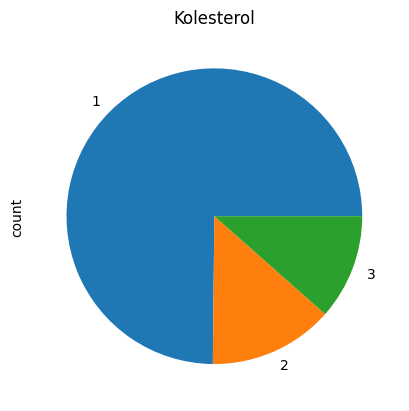

In [51]:
df["cholesterol"].value_counts().plot(kind="pie")
plt.title("Kolesterol")

#### Fråga 2
Se cirkeldiagram ovan. Vi ser att ca 3/4 av testpersonerna har normala kolesterolvärden (Kategori 1), medan vi har ca 1/8 över det normala (Kat 2) och ytterligare 1/8 långt över det normala (Kat 3).

<Axes: xlabel='age', ylabel='Count'>

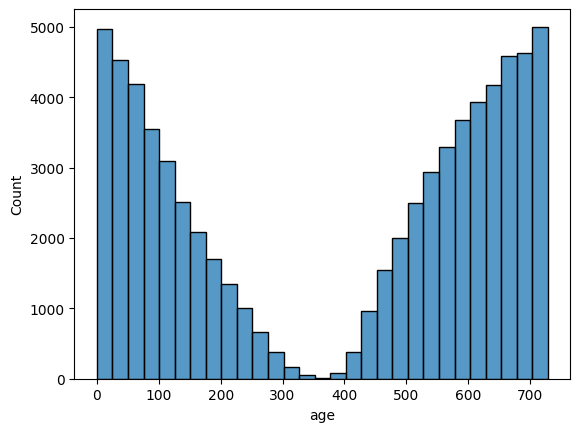

In [53]:
df["age"]=df["age"] % 730
sns.histplot(df["age"])

Skriv lite här om skumma åldersfördelningen...


In [54]:
df["smoke"].value_counts(normalize=True)

smoke
0    0.911871
1    0.088129
Name: proportion, dtype: float64

#### Fråga 4
Vi ser att ca 91% är icke-rökare (Kategori 0), medan ca 9% är rökare (1).